<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/AAI/TP/AAI_TP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from skimage.feature import local_binary_pattern
from sklearn.neighbors import KNeighborsClassifier

# **Part 1**

In [ ]:


def calculate_lbp(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray_image.shape
    lbp_image = np.zeros_like(gray_image, dtype=np.uint8)
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]

    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            center_pixel = gray_image[r, c]
            binary_string = ''
            for (dr, dc) in offsets:
                neighbor_pixel = gray_image[r + dr, c + dc]
                binary_string += '1' if neighbor_pixel >= center_pixel else '0'

            lbp_value = int(binary_string, 2)
            lbp_image[r, c] = lbp_value

    return lbp_image


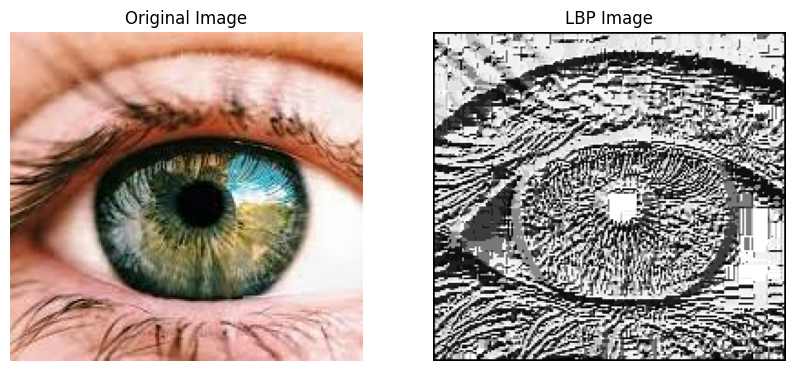

In [ ]:
image = cv2.imread("/content/pic.jpeg")
lbp_image = calculate_lbp(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("LBP Image")
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.show()


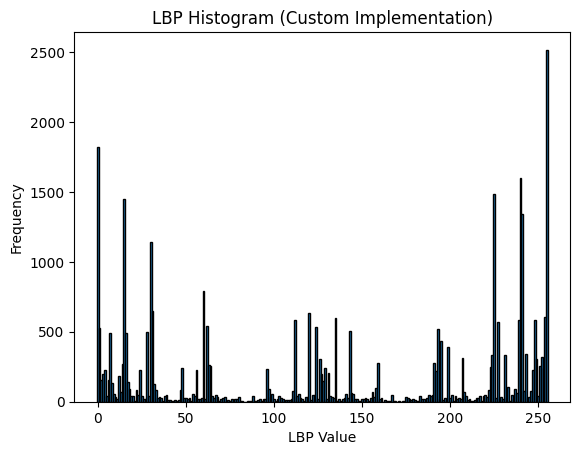

In [ ]:
def calculate_histogram(image, num_bins=256):

    histogram = [0] * num_bins

    # Flatten the image into a 1D array
    flat_image = image.ravel()

    # Count occurrences of each pixel value
    for pixel_value in flat_image:
        histogram[pixel_value] += 1

    return histogram


histogram = calculate_histogram(lbp_image)
plt.figure()
plt.title("LBP Histogram (Custom Implementation)")
plt.bar(range(len(histogram)), histogram, width=1, edgecolor='black')
plt.xlabel("LBP Value")
plt.ylabel("Frequency")
plt.show()

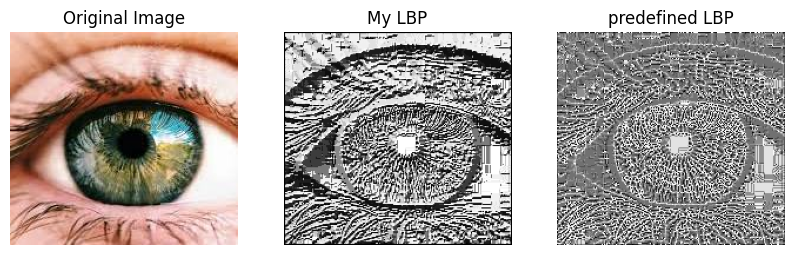

In [ ]:


image = cv2.imread("./pic.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lbp_predefined = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
lbp_image = calculate_lbp(image)



plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("My LBP")
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("predefined LBP")
plt.imshow(lbp_predefined, cmap='gray')
plt.axis('off')

plt.show()



# **Part 2**


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ahmad5hamdy12/orl-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdessami
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahmad5hamdy12/orl-dataset


100%|██████████| 3.61M/3.61M [00:00<00:00, 173MB/s]

In [ ]:
# brodatz: https://sipi.usc.edu/database/database.php?volume=textures
!wget https://sipi.usc.edu/database/textures.zip -O brodatz.zip
!unzip brodatz.zip
!mv textures/ brodatz/

--2024-12-04 06:34:58--  https://sipi.usc.edu/database/textures.zip
Resolving sipi.usc.edu (sipi.usc.edu)... 68.181.2.90
Connecting to sipi.usc.edu (sipi.usc.edu)|68.181.2.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29720623 (28M) [application/zip]
Saving to: ‘brodatz.zip’

brodatz.zip         100%[===================>]  28.34M  65.7MB/s    in 0.4s    

2024-12-04 06:34:59 (65.7 MB/s) - ‘brodatz.zip’ saved [29720623/29720623]

Archive:  brodatz.zip
   creating: textures/
  inflating: textures/1.1.01.tiff    
  inflating: textures/1.1.02.tiff    
  inflating: textures/1.1.03.tiff    
  inflating: textures/1.1.04.tiff    
  inflating: textures/1.1.05.tiff    
  inflating: textures/1.1.06.tiff    
  inflating: textures/1.1.07.tiff    
  inflating: textures/1.1.08.tiff    
  inflating: textures/1.1.09.tiff    
  inflating: textures/1.1.10.tiff    
  inflating: textures/1.1.11.tiff    
  inflating: textures/1.1.12.tiff    
  inflating: textures/1.1.13.tiff  

In [ ]:
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)


In [ ]:
def equalize_histogram(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)


In [ ]:
image = cv2.imread("./pic.jpg")

In [ ]:
preprocessed_image = apply_median_filter(image)
preprocessed_image = equalize_histogram(preprocessed_image)


In [ ]:
def calculate_grayscale_histogram(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram = calculate_histogram(gray_image)  # Use the custom histogram function
    return histogram


In [ ]:
def calculate_mean(image):
    return np.mean(image)

def calculate_variance(image):
    return np.var(image)


def calculate_skewness(image):
    return skew(image.ravel())

def calculate_features(image):
    return [
        calculate_mean(image),
        calculate_variance(image),
        calculate_skewness(image)
    ]


In [ ]:
#ORL: https://www.kaggle.com/datasets/ahmad5hamdy12/orl-dataset
#brod: https://multibandtexture.recherche.usherbrooke.ca/images/Original_Brodatz.zip


Archive:  brodatz.zip
   creating: textures/
  inflating: textures/1.1.01.tiff    
  inflating: textures/1.1.02.tiff    
  inflating: textures/1.1.03.tiff    
  inflating: textures/1.1.04.tiff    
  inflating: textures/1.1.05.tiff    
  inflating: textures/1.1.06.tiff    
  inflating: textures/1.1.07.tiff    
  inflating: textures/1.1.08.tiff    
  inflating: textures/1.1.09.tiff    
  inflating: textures/1.1.10.tiff    
  inflating: textures/1.1.11.tiff    
  inflating: textures/1.1.12.tiff    
  inflating: textures/1.1.13.tiff    
  inflating: textures/1.2.01.tiff    
  inflating: textures/1.2.02.tiff    
  inflating: textures/1.2.03.tiff    
  inflating: textures/1.2.04.tiff    
  inflating: textures/1.2.05.tiff    
  inflating: textures/1.2.06.tiff    
  inflating: textures/1.2.07.tiff    
  inflating: textures/1.2.08.tiff    
  inflating: textures/1.2.09.tiff    
  inflating: textures/1.2.10.tiff    
  inflating: textures/1.2.11.tiff    
  inflating: textures/1.2.12.tiff    
  inf

In [ ]:
#feature_vectors = [calculate_features(img) for img in dataset]

In [ ]:
def train_classifier(features, labels):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(features, labels)
    return knn


In [ ]:
#prediction = knn.predict([calculate_features(new_image)])
#print("Predicted Class:", prediction)
